In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from cryoet.data.functional import normalize_volume_to_unit_range
from cryoet.data.parsers import get_volume_and_objects, read_annotated_volume
from cryoet.data.parsers import visualize_slices_grid


In [2]:
root = "./data/czii-cryo-et-object-identification"

mode = "denoised"

In [3]:
sample1 = read_annotated_volume(root, "TS_5_4", mode, use_6_classes=True)


In [4]:
# fig

In [5]:
from cryoet.data.augmentations.functional import random_erase_objects, rotate_and_scale_volume

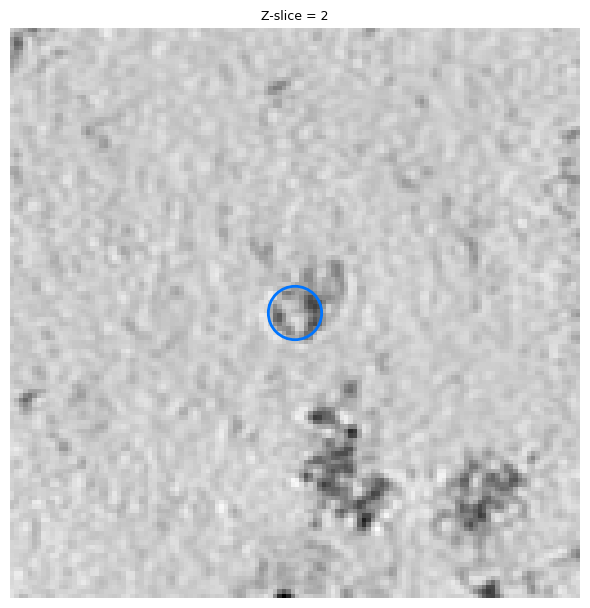

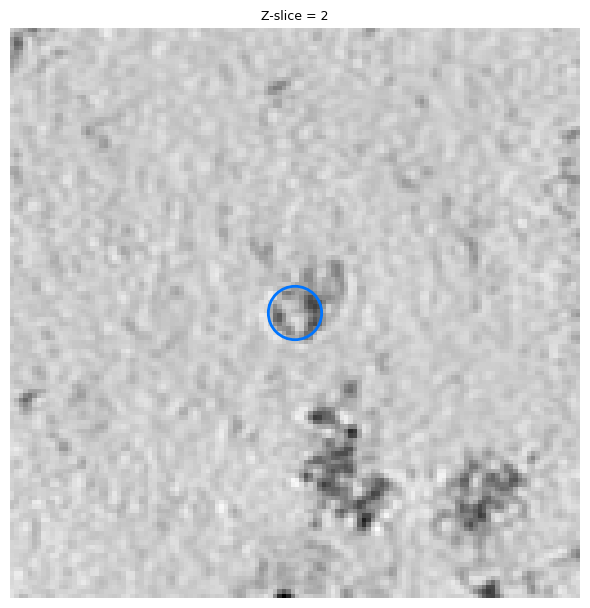

In [6]:
from cryoet.data.augmentations.functional import get_points_mask_within_cube

new_volume, new_centers = rotate_and_scale_volume(sample1.volume,
                               sample1.centers_px,
                               center_zyx=(sample1.centers_px[5,2], sample1.centers_px[5,1], sample1.centers_px[5,0]),
                               angles=(1,1,1),
                               scale=1,
                               output_shape=(4, 128, 128))

mask = get_points_mask_within_cube(new_centers, new_volume.shape)

data = dict(
    volume=new_volume,
    centers=new_centers[mask],
    radius=sample1.radius_px[mask],
    labels=sample1.labels[mask],
)

fig = visualize_slices_grid(
    **data,
    slices_to_show=None,
    only_slices_with_objects=True,
    voxel_size=1.0,
    ncols=4,
)
fig

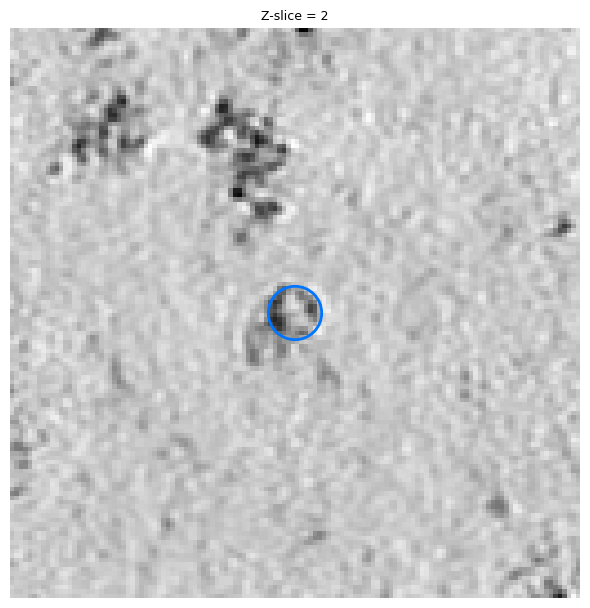

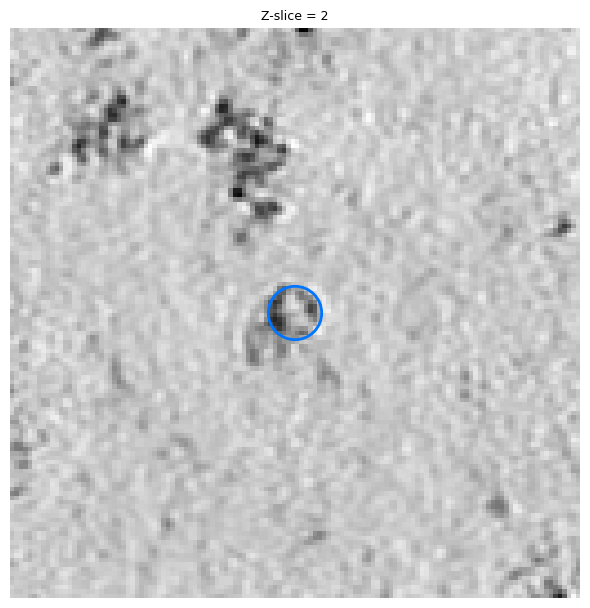

In [14]:
sample2 = sample1.rot90(2)
new_volume, new_centers = rotate_and_scale_volume(sample2.volume,
                               sample2.centers_px,
                               center_zyx=(sample2.centers_px[5,2], sample2.centers_px[5,1], sample2.centers_px[5,0]),
                               angles=(1,1,1),
                               scale=1,
                               output_shape=(4, 128, 128))

mask = get_points_mask_within_cube(new_centers, new_volume.shape)

data = dict(
    volume=new_volume,
    centers=new_centers[mask],
    radius=sample2.radius_px[mask],
    labels=sample2.labels[mask],
)

fig = visualize_slices_grid(
    **data,
    slices_to_show=None,
    only_slices_with_objects=True,
    voxel_size=1.0,
    ncols=4,
)
fig

In [8]:
data["volume"].shape

(4, 128, 128)

In [9]:
data["centers"].shape, data["labels"].shape, data["radius"].shape

((1, 3), (1,), (1,))

In [10]:
dropped = random_erase_objects(**data, prob=1, remove_overlap=False)
dropped["centers"].shape, dropped["labels"].shape, dropped["radius"].shape


((0, 3), (0,), (0,))

C:\Users\ekhve\AppData\Local\Temp\ipykernel_2252\1245156951.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


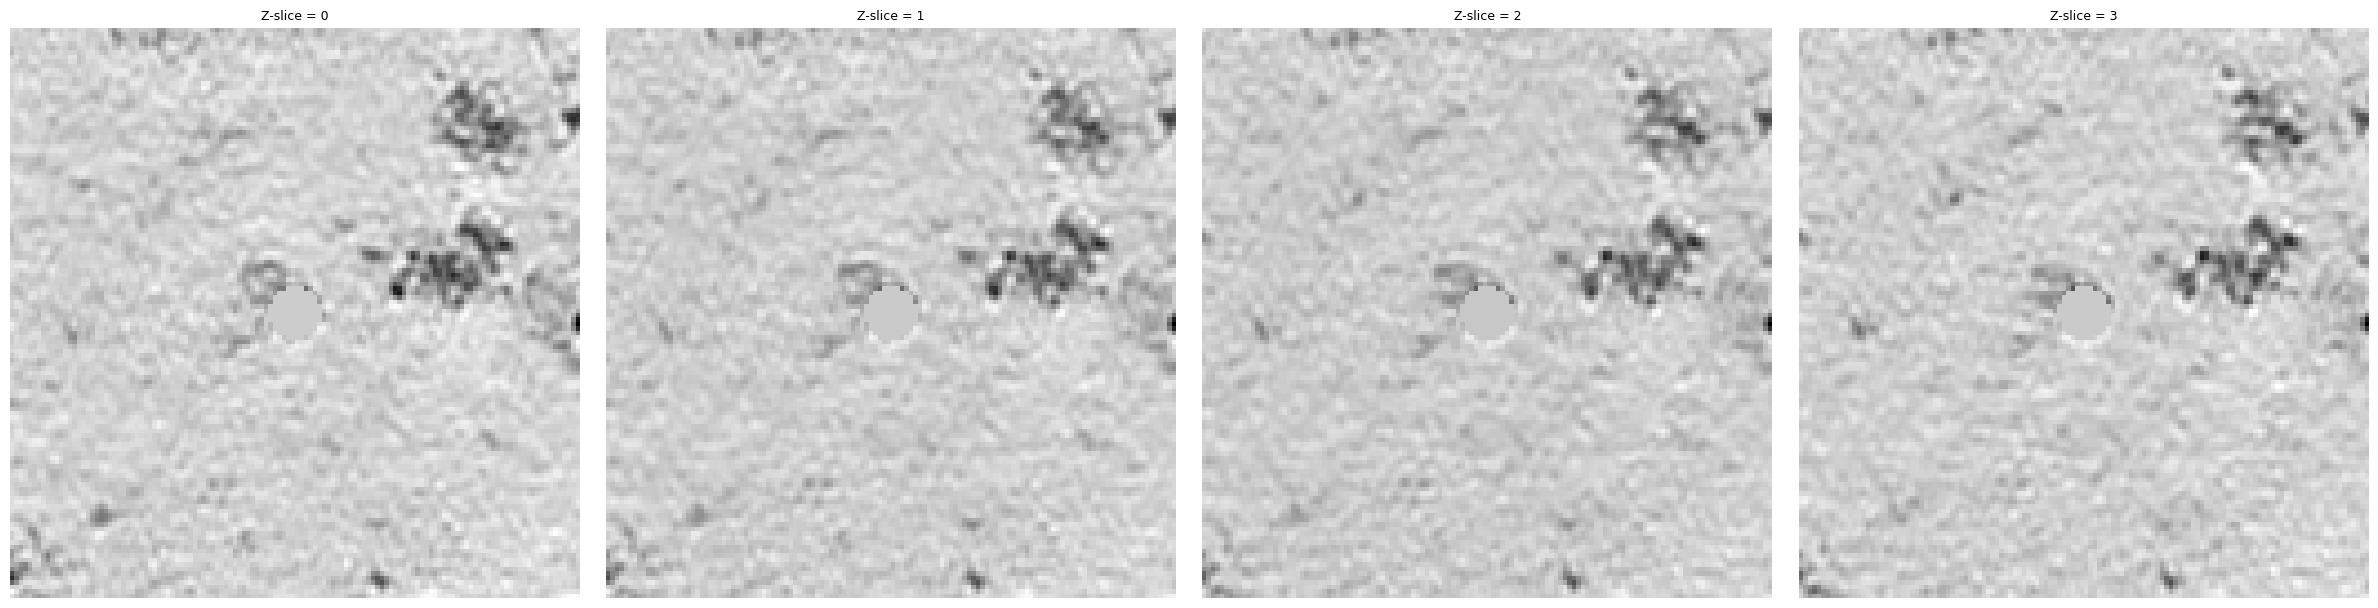

In [11]:
fig = visualize_slices_grid(
    **dropped,
    slices_to_show=None,
    only_slices_with_objects=False,
    voxel_size=1.0,
    ncols=4,
)
fig.show()